# Introduction

In this project I am required to wrangle the tweets of twitter account WeRateDogs.I will Gather, assess then clean data. All information are gathered from ether twitter archive, Images predection file from Udacity and from twitter API.

In [1]:
# Importing the needed libraries.
import pandas as pd
import requests
import matplotlib as plt
%matplotlib inline

In [ ]:
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [2]:
jsonfile = pd.read_json("tweet-json.txt", lines=True) # reading the jason file

In [3]:
jsonfile # see how the jason file looks

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [4]:
jsonfile.info() # getting more info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [5]:
jsonfile.describe() # even more info

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [6]:
jsonfile[jsonfile['id'].duplicated()] #checking for duplications

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [7]:
jsonfile[jsonfile['favorited']] #checking for favorited teweets if they are related

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
21,NaN,NaN,2017-07-19 03:39:09,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 887517108413886465, 'id_str'...",46959,True,I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,...,0.0,NaN,NaN,NaN,12082,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
61,NaN,NaN,2017-06-28 16:09:20,"[0, 129]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 880095777175076864, 'id_str'...",28150,True,Please don't send in photos without dogs in th...,NaN,...,0.0,NaN,NaN,NaN,4533,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
63,NaN,NaN,2017-06-27 12:14:36,"[16, 31]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,315,True,@RealKentMurphy 14/10 confirmed,NaN,...,NaN,NaN,NaN,NaN,10,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
454,NaN,NaN,2017-01-09 04:04:51,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,True,RT @dog_rates: Meet Moose. He doesn't want his...,NaN,...,NaN,NaN,NaN,NaN,9366,False,{'created_at': 'Wed Jan 04 01:05:59 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
471,NaN,NaN,2017-01-04 01:05:59,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 816450564926164996, 'id_str'...",33961,True,Meet Moose. He doesn't want his friend to go b...,NaN,...,0.0,NaN,NaN,NaN,9366,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
588,NaN,NaN,2016-11-17 17:50:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,True,RT @dog_rates: I WAS SENT THE ACTUAL DOG IN TH...,NaN,...,NaN,NaN,NaN,NaN,6478,False,{'created_at': 'Fri Sep 09 18:31:54 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
787,NaN,NaN,2016-09-09 18:31:54,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 774314388044058624, 'id_str'...",24167,True,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,NaN,...,0.0,NaN,NaN,NaN,6478,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1005,NaN,NaN,2016-06-28 01:21:27,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747600758972026880, 'id_str'...",2545,True,This is Bookstore and Seaweed. Bookstore is ti...,NaN,...,0.0,NaN,NaN,NaN,619,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [8]:
jsonfile[jsonfile['retweeted']] #checking for retweeted teweets if they are related

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user


In [9]:
#taking important fields
new_jasonfile = jsonfile[['created_at','favorite_count','favorited','full_text','id','in_reply_to_status_id','retweet_count']]

In [10]:
new_jasonfile 

,created_at,favorite_count,favorited,full_text,id,in_reply_to_status_id,retweet_count
0,2017-08-01 16:23:56,39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,NaN,8853
1,2017-08-01 00:17:27,33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,NaN,6514
2,2017-07-31 00:18:03,25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,NaN,4328
3,2017-07-30 15:58:51,42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,NaN,8964
4,2017-07-29 16:00:24,41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,NaN,9774
5,2017-07-29 00:08:17,20562,False,Here we have a majestic great white breaching ...,891087950875897856,NaN,3261
6,2017-07-28 16:27:12,12041,False,Meet Jax. He enjoys ice cream so much he gets ...,890971913173991426,NaN,2158
7,2017-07-28 00:22:40,56848,False,When you watch your owner call another dog a g...,890729181411237888,NaN,16716
8,2017-07-27 16:25:51,28226,False,This is Zoey. She doesn't want to be one of th...,890609185150312448,NaN,4429
9,2017-07-26 15:59:51,32467,False,This is Cassie. She is a college pup. Studying...,890240255349198849,NaN,7711


In [11]:
new_jasonfile.describe()

,favorite_count,id,in_reply_to_status_id,retweet_count
count,2354.000000,2.354000e+03,7.800000e+01,2354.000000
mean,8080.968564,7.426978e+17,7.455079e+17,3164.797366
std,11814.771334,6.852812e+16,7.582492e+16,5284.770364
min,0.000000,6.660209e+17,6.658147e+17,0.000000
25%,1415.000000,6.783975e+17,6.757419e+17,624.500000
50%,3603.500000,7.194596e+17,7.038708e+17,1473.500000
75%,10122.250000,7.993058e+17,8.257804e+17,3652.000000
max,132810.000000,8.924206e+17,8.862664e+17,79515.000000


In [12]:
# Downloading the image file using the request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image.tsv', 'wb').write(r.content) #saving the image file localy

335079

In [13]:
image = pd.read_csv("image.tsv", sep='\t') #reading the saved image file as csv but using the tab seperator

In [14]:
image # see how the image file looks

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [15]:
image.head() # see how the image file looks

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
image.info() # getting info for the image file 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image.describe() #more info

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
total=image["p1_conf"]+image["p2_conf"]+image["p3_conf"] #adding the confedence number to check if it is valid

In [19]:
total.describe() # checking validity

count    2075.000000
mean        0.789461
std         0.208969
min         0.126448
25%         0.657151
50%         0.855279
75%         0.971044
max         1.000000
dtype: float64

In [20]:
image[image['tweet_id'].duplicated()] # checking for duplications

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [21]:
df = pd.read_csv("twitter-archive-enhanced.csv") #reading the main file "storing it as df"

In [22]:
df  # see how the df file looks

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [23]:
#checking for duplications by marking the retweets of the tweets we have
retwweted= df[df['retweeted_status_id'].notna()]['retweeted_status_id'].values.tolist() # having all retweets ids
tweeted= df['tweet_id'].values.tolist() # having all tweets ids
retweetedint=[]
# making sure they are all integers
for ret in retwweted:
    ret=int(ret)
    retweetedint.append(ret)
duplicated_tweets =[]
#checking if a retweet id is in our tweets and adding them in a list
for retint in retweetedint:
    if retint in tweeted:
        duplicated_tweets.append(retint)
# taking a sample and checking if they are matching       
df[df['tweet_id'].isin(duplicated_tweets)]['tweet_id'].count()
print(df[df['retweeted_status_id']==duplicated_tweets[0]])
print(df[df['tweet_id']==duplicated_tweets[0]])

              tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
36  885311592912609280                    NaN                  NaN   

                    timestamp  \
36  2017-07-13 01:35:06 +0000   

                                               source  \
36  <a href="http://twitter.com/download/iphone" r...   

                                                 text  retweeted_status_id  \
36  RT @dog_rates: This is Lilly. She just paralle...         8.305833e+17   

    retweeted_status_user_id retweeted_status_timestamp  \
36              4.196984e+09  2017-02-12 01:04:29 +0000   

                                        expanded_urls  rating_numerator  \
36  https://twitter.com/dog_rates/status/830583320...                13   

    rating_denominator   name doggo floofer pupper puppo  
36                  10  Lilly  None    None   None  None  
               tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
356  830583320585068544                    NaN               

In [24]:
df.head() #getting more info

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [25]:
df.info() #getting more info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [26]:
df.shape #getting more info

(2356, 17)

In [27]:
df.describe() #getting more info

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [28]:
df['name'].value_counts() #checking names values

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Daisy          7
Bailey         7
an             7
Buddy          7
Scout          6
Koda           6
Stanley        6
Oscar          6
Jack           6
Milo           6
Bella          6
Leo            6
Jax            6
Rusty          6
Dave           6
Chester        5
            ... 
Keet           1
Obie           1
Alexander      1
Furzey         1
Maya           1
Beemo          1
Opie           1
Skittles       1
Eriq           1
Zeek           1
Angel          1
Tonks          1
Strider        1
Iroh           1
Glacier        1
Caryl          1
Tassy          1
Bilbo          1
Scruffers      1
Tito           1
Julio          1
Sprinkles      1
Oddie          1
Zooey          1
Ralphé         1
Lilah          1
Lolo           1
Rilo          

### Data type : timestamp need to be converted to time and date object. (Quality)
#### Define:
    Timestamps have to be in date and time format. I will do it using to_datetime from pandas
    
#### Code:    

In [29]:
df['timestamp']=pd.to_datetime(df['timestamp']) # changing to date and time object

#### Test:

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Data type : retweeted_status_timestamp need to be converted to time and date object. (Quality)
#### Define:
    Timestamps have to be in date and time format. I will do it using to_datetime from pandas
    
#### Code:    

In [31]:
df['retweeted_status_timestamp']=pd.to_datetime(df['retweeted_status_timestamp']) # changing to date and time object

#### Test:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Wrong data: name mistakes in "name" column like an, a. (Quality)
#### Define:
    There are mistakes in the column name where some values are "a", "an" or "the" which is incorrect and need to be removed or replaced with the name. For now I will make them none.
    
#### Code:    

In [33]:
df['name']=df['name'].replace('a', None) #removing wrong names
df['name']=df['name'].replace('an', None) #removing wrong names
df['name']=df['name'].replace('the', None) #removing wrong names

#### Test:

In [34]:
df['name'].value_counts()

None         778
Oliver        13
Charlie       12
Cooper        11
Lucy          11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
Daisy          8
Toby           7
Bailey         7
Stanley        7
Buddy          7
Leo            6
Scout          6
Oscar          6
Dave           6
Jack           6
Rusty          6
Milo           6
Bella          6
Jax            6
Koda           6
Chester        5
Sammy          5
very           5
Gus            5
            ... 
Pip            1
Fabio          1
Keet           1
Obie           1
Alexander      1
Furzey         1
Herb           1
Opie           1
Tito           1
Brian          1
Gustaf         1
Zeek           1
Angel          1
Tonks          1
Strider        1
Iroh           1
Glacier        1
Tassy          1
Bilbo          1
Eriq           1
Scruffers      1
Julio          1
Sprinkles      1
Oddie          1
Zooey          1
Ralphé         1
Lilah          1
Lolo          

### Missing data: missing images is not clear in the enhancecd table. (Quality)
#### Define:
    Some of the tweets has no image we can check for that if we take the tweets ids the ones only in the image list from the image table.
    
#### Code:    

In [35]:
ids_in_image=[]
# adding all tweets ids that have images in a list
for id_number in image['tweet_id']:
    ids_in_image.append(id_number)

# adding a column to tell if a tweet has an image or no
df['has_image']=df['tweet_id'].isin(ids_in_image)


#### Test:

In [36]:
print(image['tweet_id'].count()) # number of images
df['has_image'].value_counts() # the new column with its indicators

2075


True     2075
False     281
Name: has_image, dtype: int64

### Wrong data: Numbers in dominator can't be 0. (Quality). 
#### Define:
    Dominator can't be 0 since this has no meaning. here I need to check what is the numenator for each 0 dominator to have full understaning. or even check the text.
    
#### Code:    

In [37]:
df[df['rating_denominator']==0] #searching for 0 values

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,has_image
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaT,NaN,960,0,None,None,None,None,None,False


In [38]:
df[df['rating_denominator']==0].text.values[0] #making sure it is incorrect

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [39]:
#replacing with the correct values
df.loc[df['rating_denominator']==0, ['rating_numerator']] = 13 
df.loc[df['rating_denominator']==0, ['rating_denominator']] = 10

#### Test:

In [40]:
df[df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,has_image


### Inacurate data: numbers in the rating numerator doesn't follow a rule so it is better to calculate the rating using both numerator and denominator. (Quality)
#### Define:
    To have a better understanding of the rating we need to have a clear reading. here we need to have the rating numerator linked to the denominator. so we will add a new column represents numerator/denominator
    
#### Code:    

In [41]:
df['num/dem']=(df['rating_numerator']/df['rating_denominator']) #new column =  rating_numerator/ rating_denominator

#### Test:

In [42]:
df['num/dem']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
19      1.3
20      1.2
21      1.3
22      1.4
23      1.3
24      1.3
25      1.2
26      1.3
27      1.3
28      1.3
29      1.2
       ... 
2326    0.2
2327    0.7
2328    0.9
2329    1.1
2330    0.6
2331    0.8
2332    1.0
2333    0.9
2334    0.3
2335    0.5
2336    1.1
2337    1.0
2338    0.1
2339    1.1
2340    0.8
2341    0.9
2342    0.6
2343    1.0
2344    0.9
2345    1.0
2346    0.8
2347    0.9
2348    1.0
2349    0.2
2350    1.0
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: num/dem, Length: 2356, dtype: float64

### Duplicated data: there are retweeted tweets for the same account. (Quality)
#### Define:
    Some of the records are repeated with different ids because some are retweets of the same tweets (retweets have different ids). I will match the retweet id with the main id to identify the duplicates then classify the retweets in a new column.
    
#### Code:    

In [43]:
#remove the duplicated retweets from before
retwweted= df[df['retweeted_status_id'].notna()]['retweeted_status_id'].values.tolist() #retweetd tweets ids
tweeted= df['tweet_id'].values.tolist() #tweets ids
tweeted

retweetedint=[]
#convert to integer
for ret in retwweted:
    ret=int(ret)
    retweetedint.append(ret)

duplicated_tweets =[]
#matching retweets ids with the tweets
for retint in retweetedint:
    if retint in tweeted:
        duplicated_tweets.append(retint)
        
print(df[df['tweet_id'].isin(duplicated_tweets)]['tweet_id'].count())
#adding a column to represnt the duplicated tweets
df['duplicated_tweets']= df['retweeted_status_id'].isin(duplicated_tweets)
    

112


#### Test:

In [44]:
df[df['duplicated_tweets']]['retweeted_status_id'].isin(duplicated_tweets).value_counts()

True    112
Name: retweeted_status_id, dtype: int64

### Inacurate data: there are retweets. (Quality)
#### Define:
    There are retweets that we have to mark them as retweets to have a clear wat to distinguish between the tweets (Excluding the duplicated tweets).
    
#### Code:    

In [45]:
df['is_retweet']= (df['retweeted_status_id'].notna()) & (df['duplicated_tweets']== False) #adding a column to represnt the retweets excluding the duplicated

#### Test:

In [46]:
print(df[df['retweeted_status_id'].notna()]['tweet_id'].count() - 112) #112 is the duplicated that's why I substracted
df['is_retweet'].value_counts()

69


False    2287
True       69
Name: is_retweet, dtype: int64

### Inacurate data: there are replayes. (Quality)
#### Define:
    There are replays that we have to check if they are related to the same subject otherwise remove them.
    
#### Code:    

In [47]:
df['is_replay']= (df['in_reply_to_status_id'].notna()) #adding a column to represnt the replay tweets

#### Test:

In [48]:
print(df['in_reply_to_status_id'].notna().value_counts())
df[df['is_replay']]['in_reply_to_status_id'].notna().value_counts()

False    2278
True       78
Name: in_reply_to_status_id, dtype: int64


True    78
Name: in_reply_to_status_id, dtype: int64

### Types can be in one column (doggo 	floofer 	pupper 	puppo). (tideness)
#### Define:
    there are 4 column that is better and more readable to merge them into one column. I will create a new column name type and have the name of the column if there is a value. In addition, we can make or tweet status in one column (Retweet, duplicate, replay)
    
#### Code:    

In [49]:
import numpy as np #importing numpy to use NaN

#converting any None value to nan
df['doggo']=df['doggo'].replace('None',np.nan)
df['floofer']=df['floofer'].replace('None',np.nan)
df['pupper']=df['pupper'].replace('None',np.nan)
df['puppo']= df['puppo'].replace('None',np.nan)

df['Stage']=np.nan #new column init as NaN

#fill the stage with the dog stages from thier Colomns
df['Stage'].fillna(df['floofer'], inplace=True)
df['Stage'].fillna(df['pupper'], inplace=True)
df['Stage'].fillna(df['puppo'], inplace=True)
df['Stage'].fillna(df['doggo'], inplace=True) 
# Doggos type is last because some of the tweets mentiond Doggos with other stage 
#"As doggo in not always refered to a stage in the tweets"
# Being last will replace any Doggo with the other stages if they exist.


#### Test:

In [50]:
print(df['puppo'].value_counts())
print(df['floofer'].value_counts())
print(df['doggo'].value_counts())
print(df['pupper'].value_counts())
df['Stage'].value_counts()
#here to check previosly counted stages with the new one

puppo    30
Name: puppo, dtype: int64
floofer    10
Name: floofer, dtype: int64
doggo    97
Name: doggo, dtype: int64
pupper    257
Name: pupper, dtype: int64


pupper     257
doggo       83
puppo       30
floofer     10
Name: Stage, dtype: int64

### Merge important information from image, json file and the main df table to be one clear table. (tideness)
#### Define:
    Having one table with the needed information is great for my analysis. I will merge important information from each table into one table. This will include only columns that I need and only rows that is valid to my analysis.
    
#### Code:    

In [51]:
selected_columns = df[['tweet_id', 'timestamp','text', 'retweeted_status_timestamp', 'name','Stage','is_retweet','duplicated_tweets','is_replay','num/dem','has_image' ]] 
df2 = selected_columns.copy() #copying to a new dataframe with the selected columns

In [52]:
#taking only needed rows: 
indexes = df2[df2['has_image']==False].index 
df2.drop(indexes, inplace=True) # removing tweets with no image
indexes = df2[df2['is_retweet']==True].index
df2.drop(indexes, inplace=True) # removing retweets 
indexes = df2[df2['is_replay']==True].index
df2.drop(indexes, inplace=True) # removing replays
indexes = df2[df2['duplicated_tweets']==True].index
df2.drop(indexes, inplace=True) # removing duplicated tweets
#removing thier columns as we don't need them any more.
df2.drop(['has_image','is_retweet','is_replay', 'duplicated_tweets','retweeted_status_timestamp'],axis = 1, inplace=True)


In [53]:
image2 = image.copy() #copying to a new dataframe 

# taking the top dogs confident, if it is not dog will move to the next confident and so on.

image2.loc[image2.p1_dog == False, ['p1','p1_conf','p1_dog' ]] = np.nan,np.nan,np.nan #removing not dogs
#fill NA's info with the next prediction values 
image2['p1'].fillna(image2['p2'], inplace=True)
image2['p1_conf'].fillna(image2['p2_conf'], inplace=True)
image2['p1_dog'].fillna(image2['p2_dog'], inplace=True)
image2.loc[image2.p1_dog == False, ['p1','p1_conf','p1_dog' ]] = np.nan,np.nan,np.nan #removing not dogs
#fill NA's info with the next prediction values 
image2['p1'].fillna(image2['p3'], inplace=True)
image2['p1_conf'].fillna(image2['p3_conf'], inplace=True)
image2['p1_dog'].fillna(image2['p3_dog'], inplace=True)

#dropping unneeded columns
image2.drop(['p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','jpg_url', 'img_num'],axis = 1, inplace=True)

In [54]:
df2=pd.merge(df2, image2, on='tweet_id') #merging the two dataframes with tweet id as key


In [55]:
new_jasonfile.rename(columns={"id": "tweet_id"},inplace=True)#renaming id with tweet id to match the key
df2=pd.merge(df2, new_jasonfile, on=['tweet_id'],how='left') #merging the two dataframes with tweet id as key

C:\Users\Uttu\Anaconda3\lib\site-packages\pandas\core\frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [56]:
df2.drop(['favorited','full_text','in_reply_to_status_id'],axis = 1, inplace=True) #dropping unneeded columns

#### Test:

In [57]:
print('Original: ',image.p1_dog.value_counts())
print('New: ',image2.p1_dog.value_counts())
print('Total Values : ',df.count().values[0])
print('new Total Values : ',df2.count().values[0])
df2.head()

Original:  True     1532
False     543
Name: p1_dog, dtype: int64
New:  1.0      1751
False     324
Name: p1_dog, dtype: int64
Total Values :  2356
new Total Values :  1971


,tweet_id,timestamp,text,name,Stage,num/dem,p1,p1_conf,p1_dog,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3,banana,0.076110,False,2017-08-01 16:23:56,39467,8853
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3,Chihuahua,0.323581,1,2017-08-01 00:17:27,33819,6514
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2,Chihuahua,0.716012,1,2017-07-31 00:18:03,25461,4328
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3,Labrador_retriever,0.168086,True,2017-07-30 15:58:51,42908,8964
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2,basset,0.555712,1,2017-07-29 16:00:24,41048,9774


In [58]:
df2.to_csv('twitter_archive_master.csv', index=False) # saving the new dataframe as CSV

# Analysis

### Questions to answer:
    Is the rating reflected by the retweet and favorite counts?
    What type of dogs have the highiest rating?
    At what stage dogs have the most favorites?

#### Is the rating reflected by the retweet and favorite counts?

In [59]:
df2.loc[df2['num/dem']>1.4,'num/dem']=1.4 #adjusting outliers abov 1.4 to be 1.4 "assuming 1.4 is the largest vaule
retvsrat=df2.groupby(['num/dem']).mean().retweet_count #retweets per rating
favvsrat=df2.groupby(['num/dem']).mean().favorite_count #favorites per rating
df2.groupby(pd.cut(df2["num/dem"], np.arange(0, 1.0+0.5, 0.1))).mean() #grouping ratings

,tweet_id,num/dem,p1_conf,favorite_count,retweet_count
num/dem,,,,,
"(0.0, 0.1]",6.698975e+17,0.100000,0.026324,6961.750000,3122.500000
"(0.1, 0.2]",6.760437e+17,0.200000,0.143132,2480.400000,1391.700000
"(0.2, 0.3]",6.871328e+17,0.300000,0.127684,2395.526316,952.578947
"(0.3, 0.4]",6.956827e+17,0.400000,0.188006,2732.933333,1105.666667
"(0.4, 0.5]",6.870361e+17,0.500000,0.310204,3838.705882,1296.647059
"(0.5, 0.6]",6.886383e+17,0.600000,0.206644,2716.968750,1043.625000
"(0.6, 0.7]",6.861721e+17,0.698776,0.281319,3462.173077,1333.019231
"(0.7, 0.8]",6.863191e+17,0.800000,0.356602,2450.905263,904.705263
"(0.8, 0.9]",6.878535e+17,0.899458,0.428067,2537.205298,863.596026


Text(0, 0.5, 'Retweets Average')

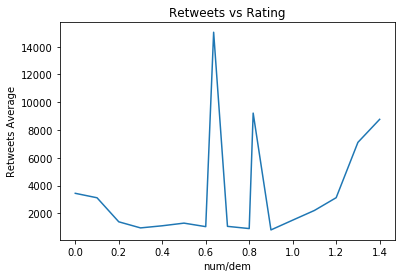

In [60]:
ret=retvsrat.plot(title='Retweets vs Rating')
ret.set_ylabel("Retweets Average")

Text(0, 0.5, 'Favorites Average')

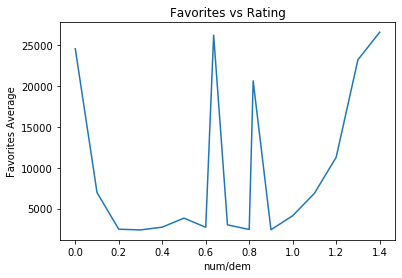

In [61]:
fav=favvsrat.plot(title='Favorites vs Rating')
fav.set_ylabel("Favorites Average")

As we can see large number of retweets doesn't mean that dogs got high rating while we can see ratings value has effect on the retweets and favorite om a different way. where extreme ratings has more retweets and favorite regardless if it is high or low.

#### What type of dogs have the highiest rating?

In [62]:
dogs_by_type=df2[df2['p1_dog']!=False].groupby(['p1']).mean() # grouped by all dog types if they exists
dogs_by_type['num/dem'] #checking rating for each dog type

p1
Afghan_hound                      0.966667
Airedale                          0.983333
American_Staffordshire_terrier    1.031250
Appenzeller                       1.100000
Australian_terrier                1.150000
Bedlington_terrier                1.033333
Bernese_mountain_dog              1.127273
Blenheim_spaniel                  1.110000
Border_collie                     1.058333
Border_terrier                    1.214286
Boston_bull                       0.941667
Bouvier_des_Flandres              1.300000
Brabancon_griffon                 1.000000
Brittany_spaniel                  1.037500
Cardigan                          1.114286
Chesapeake_Bay_retriever          1.083871
Chihuahua                         1.049293
Dandie_Dinmont                    0.957143
Doberman                          1.133333
English_setter                    0.987500
English_springer                  1.050000
EntleBucher                       1.100000
Eskimo_dog                        1.140909
French_b

In [63]:
dogs_by_type[dogs_by_type['num/dem']>1.2]['num/dem'] # top dogs types with rating above 1.2

p1
Border_terrier          1.214286
Bouvier_des_Flandres    1.300000
Saluki                  1.250000
Tibetan_mastiff         1.225000
briard                  1.233333
clumber                 1.400000
Name: num/dem, dtype: float64

Text(0.5, 0, 'Dog Type')

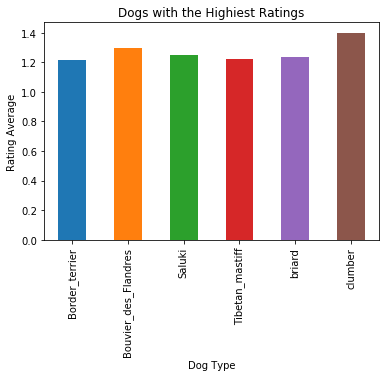

In [64]:
dogs_rating=dogs_by_type[dogs_by_type['num/dem']>1.2]['num/dem'].plot(kind="Bar",title='Dogs with the Highiest Ratings')
dogs_rating.set_ylabel("Rating Average")
dogs_rating.set_xlabel("Dog Type")

As we can see the top rated dogs are :Border_terrier, Bouvier_des_Flandres, Saluki, Tibetan_mastiff, briard, clumber, with clumber being the highiest rating

#### At what stage dogs have the most favorites?

In [65]:
Dogs_Stages=df2[df2['Stage']!=None].groupby(['Stage']).mean()['favorite_count'] # grouped by all dog stages if they exists

Text(0, 0.5, 'Favorites Average Counts')

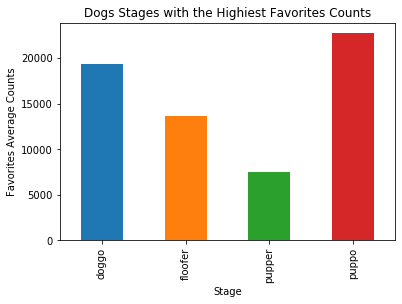

In [66]:
Dogsplot=Dogs_Stages.plot(kind="Bar",title='Dogs Stages with the Highiest Favorites Counts')
Dogsplot.set_ylabel("Favorites Average Counts")

As it shown above, People seems to like the dogs at the Puppo stage the most, While they like Pupper stage the least.

# Conclusion
In conclusion, Preparing ,cleaning and analyzing this data was intresting. We came out with three answers to our three questions. We can say that when we evaluate a dog type or a dog stage on how people like it it is better to use the likes "Favorites"  instead of the rating which is an indecator thats not every rating matches what people likes the most.